In [1]:
# Task - 1

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
df = pd.read_csv('adult_with_headers.csv')

# Basic Data Exploration
print("Summary Statistics:\n", df.describe(include='all'))
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Handling Missing Values
# Impute missing values for numerical features with the mean
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = df[numerical_features].apply(lambda x: x.fillna(x.mean()))

# For categorical features, we can impute with the most frequent value
categorical_features = df.select_dtypes(include=['object']).columns
for column in categorical_features:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Verifying missing values are handled
print("\nMissing Values after imputation:\n", df.isnull().sum())

# Scaling Techniques
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Standard Scaling
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = standard_scaler.fit_transform(df_standard_scaled[numerical_features])

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df.copy()
df_min_max_scaled[numerical_features] = min_max_scaler.fit_transform(df_min_max_scaled[numerical_features])

# Display scaled data for verification
print("\nStandard Scaled Data (First 5 rows):\n", df_standard_scaled.head())
print("\nMin-Max Scaled Data (First 5 rows):\n", df_min_max_scaled.head())

# Discussion on Scaling Techniques
print("""
Scaling Techniques:

1. Standard Scaling (StandardScaler):
   - This technique scales the data to have a mean of 0 and a standard deviation of 1.
   - It is useful when the features have different scales and we want to standardize them to a common scale.
   - Preferred when the data follows a Gaussian (normal) distribution.

2. Min-Max Scaling (MinMaxScaler):
   - This technique scales the data to a fixed range, typically 0 to 1.
   - It is useful when we want to preserve the relationships between the data points and avoid distorting the differences between values.
   - Preferred when the data does not necessarily follow a Gaussian distribution and we want to bound the values to a specific range.
""")


Summary Statistics:
                  age workclass        fnlwgt education  education_num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

             marital_status       occupation relationship    race    sex  \
count                 3256

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load the dataset
df = pd.read_csv('adult_with_headers.csv')

# Handling Missing Values (repeat as before for completeness)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = df[numerical_features].apply(lambda x: x.fillna(x.mean()))

categorical_features = df.select_dtypes(include=['object']).columns
for column in categorical_features:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Encoding Techniques
# Separate categorical features with less than 5 and more than 5 categories
less_than_5_categories = [col for col in categorical_features if df[col].nunique() < 5]
more_than_5_categories = [col for col in categorical_features if df[col].nunique() >= 5]

# Apply One-Hot Encoding
df_one_hot_encoded = df.copy()
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
one_hot_encoded_data = one_hot_encoder.fit_transform(df_one_hot_encoded[less_than_5_categories])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data, columns=one_hot_encoder.get_feature_names_out(less_than_5_categories))
df_one_hot_encoded = df_one_hot_encoded.drop(less_than_5_categories, axis=1).join(one_hot_encoded_df)

# Apply Label Encoding
df_label_encoded = df.copy()
label_encoders = {}
for col in more_than_5_categories:
    label_encoders[col] = LabelEncoder()
    df_label_encoded[col] = label_encoders[col].fit_transform(df_label_encoded[col])

# Display the encoded data for verification
print("\nOne-Hot Encoded Data (First 5 rows):\n", df_one_hot_encoded.head())
print("\nLabel Encoded Data (First 5 rows):\n", df_label_encoded.head())

# Discussion on Encoding Techniques
print("""
Encoding Techniques:

1. One-Hot Encoding:
   - This technique creates a binary column for each category and returns a sparse matrix or dense array.
   - Pros:
     - Does not assume any ordinal relationship between categories.
     - Useful when categorical variables do not have an intrinsic ordering.
   - Cons:
     - Increases the dimensionality of the data, which can be computationally expensive.
     - Not suitable for categorical variables with a high number of categories.

2. Label Encoding:
   - This technique assigns a unique integer to each category.
   - Pros:
     - Simple and straightforward to implement.
     - Does not increase the dimensionality of the data.
   - Cons:
     - Assumes an ordinal relationship between categories, which may not be appropriate.
     - Can introduce errors in algorithms that take numerical order into account.
""")



One-Hot Encoded Data (First 5 rows):
    age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race  \
0        Never-married        Adm-clerical   Not-in-family   White   
1   Married-civ-spouse     Exec-managerial         Husband   White   
2             Divorced   Handlers-cleaners   Not-in-family   White   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black   
4   Married-civ-spouse      Prof-specialty            Wife   Black   

   capital_gain  capital_loss  hours_per_week  native_country  sex_ Male  \
0          2174             0              40   United-States        1.0   
1  

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
# Task - 3


Data with New Features and Log Transformation (First 5 rows):
    age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  \
0  

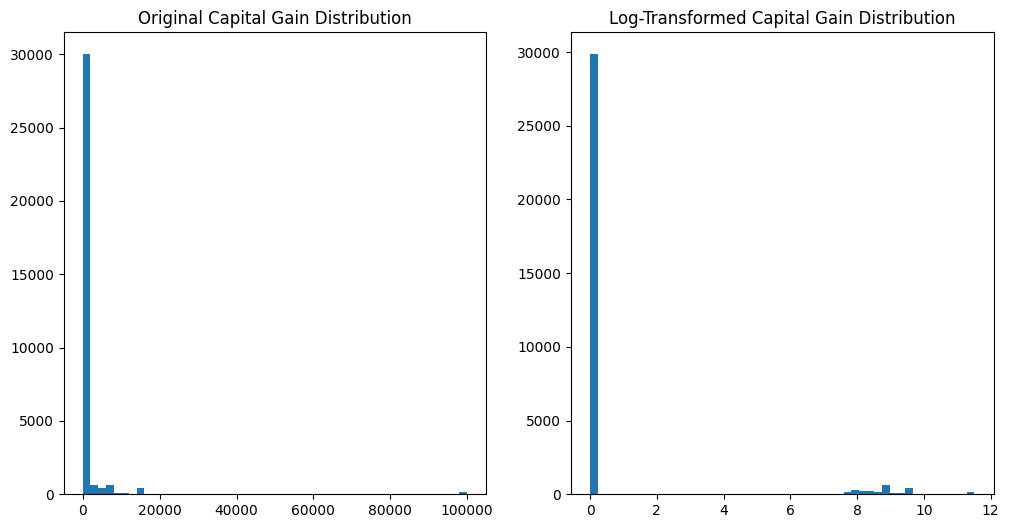


New Features:

1. Age Group:
   - Rationale: Different age groups can exhibit different behaviors and patterns. Categorizing age into groups can help the model capture these patterns more effectively.

2. Income per Hour:
   - Rationale: Income per hour provides a more normalized measure of an individual's earning capacity, considering both gains and losses, and the number of hours worked.

Log Transformation:

1. Capital Gain:
   - Rationale: The `capital_gain` feature often has a right-skewed distribution, which can negatively impact the model. Applying a log transformation helps normalize this feature, making it more suitable for modeling.



In [5]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('adult_with_headers.csv')

# Handling Missing Values (as previously done)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = df[numerical_features].apply(lambda x: x.fillna(x.mean()))

categorical_features = df.select_dtypes(include=['object']).columns
for column in categorical_features:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Creating New Features

# Feature 1: Age Group
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

# Feature 2: Income per Hour
# Assuming 'income' is numerical, but since it is a categorical column ('<=50K', '>50K'), we need to simplify the income representation
# For simplicity, let's encode 'income' to 0 for '<=50K' and 1 for '>50K'
df['income_encoded'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
df['income_per_hour'] = (df['capital_gain'] - df['capital_loss']) / df['hours_per_week']

# Log Transformation on Capital Gain
# Adding a small constant to avoid log(0)
df['capital_gain_log'] = np.log1p(df['capital_gain'])

# Display the updated DataFrame
print("\nData with New Features and Log Transformation (First 5 rows):\n", df.head())

# Verifying the transformation effect
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['capital_gain'], bins=50)
plt.title('Original Capital Gain Distribution')

plt.subplot(1, 2, 2)
plt.hist(df['capital_gain_log'], bins=50)
plt.title('Log-Transformed Capital Gain Distribution')

plt.show()

# Discussion on New Features and Transformation
print("""
New Features:

1. Age Group:
   - Rationale: Different age groups can exhibit different behaviors and patterns. Categorizing age into groups can help the model capture these patterns more effectively.

2. Income per Hour:
   - Rationale: Income per hour provides a more normalized measure of an individual's earning capacity, considering both gains and losses, and the number of hours worked.

Log Transformation:

1. Capital Gain:
   - Rationale: The `capital_gain` feature often has a right-skewed distribution, which can negatively impact the model. Applying a log transformation helps normalize this feature, making it more suitable for modeling.
""")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Number of outliers removed: 326


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea


Predictive Power Score (PPS) Matrix:
 y                      age  age_group  capital_gain  capital_gain_log  \
x                                                                       
age               1.000000   0.999499      0.000000          0.000000   
age_group         0.791341   1.000000      0.000000          0.000000   
capital_gain      0.010115   0.000000      1.000000          0.998457   
capital_gain_log  0.009780   0.000000      0.999155          1.000000   
capital_loss      0.000000   0.000000      0.000000          0.000000   
education         0.024949   0.063581      0.000000          0.000000   
education_num     0.024949   0.063581      0.000000          0.000000   
fnlwgt            0.000000   0.095437      0.000000          0.000000   
hours_per_week    0.005140   0.030766      0.000000          0.000000   
income            0.033530   0.000000      0.000000          0.000000   
income_encoded    0.000000   0.000000      0.000000          0.000000   
income_per_h

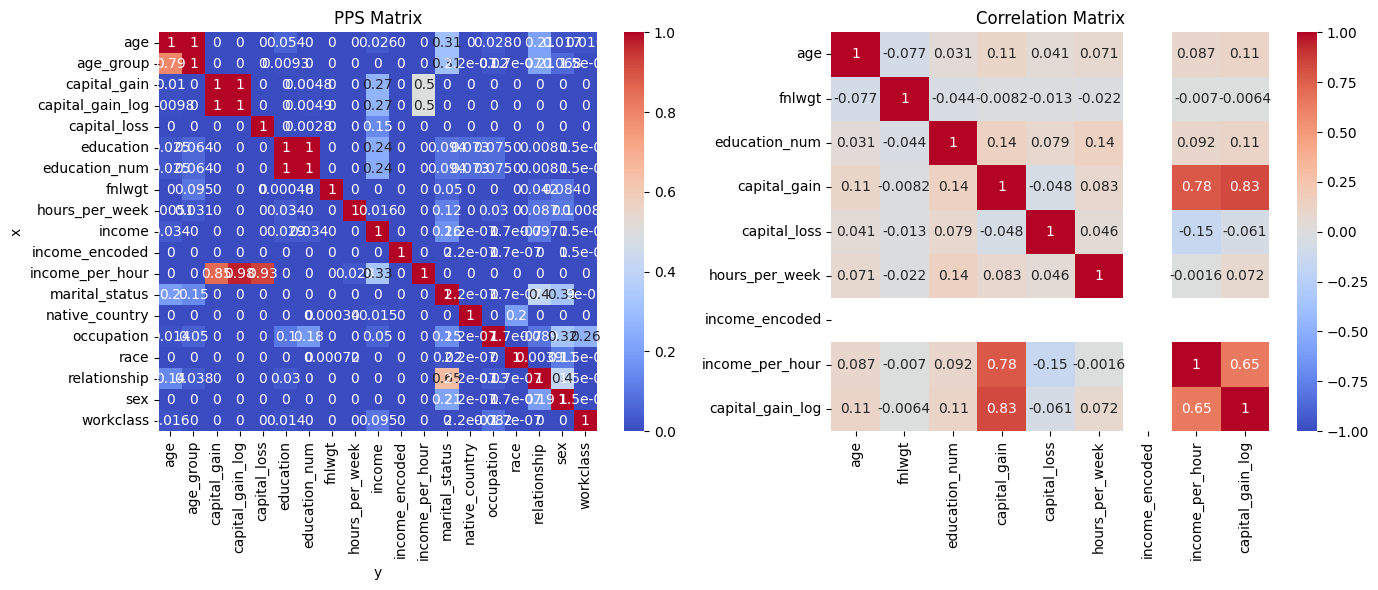


Outliers:
- Outliers can distort the model's training process by introducing extreme values that the model tries to accommodate, leading to biased or overfitted models.
- The Isolation Forest algorithm effectively identifies and removes outliers, which helps in stabilizing the model's performance.

Predictive Power Score (PPS):
- PPS provides a measure of the predictive power of one feature on another, capturing non-linear relationships that traditional correlation might miss.
- Unlike the correlation matrix, which measures linear relationships, PPS can capture more complex interactions between features.

Comparison:
- The correlation matrix shows the strength and direction of linear relationships between features.
- PPS shows the predictive power, which can uncover hidden patterns not visible through linear correlation alone.



In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import ppscore as pps

# Load the dataset
df = pd.read_csv('adult_with_headers.csv')

# Handling Missing Values (as previously done)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = df[numerical_features].apply(lambda x: x.fillna(x.mean()))

categorical_features = df.select_dtypes(include=['object']).columns
for column in categorical_features:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Creating New Features
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
df['income_encoded'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
df['income_per_hour'] = (df['capital_gain'] - df['capital_loss']) / df['hours_per_week']
df['capital_gain_log'] = np.log1p(df['capital_gain'])

# Identifying and Removing Outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['outliers'] = iso_forest.fit_predict(df[numerical_features])
df_cleaned = df[df['outliers'] == 1].drop('outliers', axis=1)

# Display the number of outliers removed
outliers_removed = df.shape[0] - df_cleaned.shape[0]
print(f"\nNumber of outliers removed: {outliers_removed}")

# Apply PPS to find relationships between features
pps_matrix = pps.matrix(df_cleaned)[['x', 'y', 'ppscore']].pivot(columns='y', index='x', values='ppscore')

# Display PPS matrix
print("\nPredictive Power Score (PPS) Matrix:\n", pps_matrix)

# Compare with the correlation matrix
correlation_matrix = df_cleaned.corr()

# Display Correlation Matrix
print("\nCorrelation Matrix:\n", correlation_matrix)

# Visualization of PPS and Correlation Matrices for Comparison
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pps_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('PPS Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

# Discussion on Outliers and PPS
print("""
Outliers:
- Outliers can distort the model's training process by introducing extreme values that the model tries to accommodate, leading to biased or overfitted models.
- The Isolation Forest algorithm effectively identifies and removes outliers, which helps in stabilizing the model's performance.

Predictive Power Score (PPS):
- PPS provides a measure of the predictive power of one feature on another, capturing non-linear relationships that traditional correlation might miss.
- Unlike the correlation matrix, which measures linear relationships, PPS can capture more complex interactions between features.

Comparison:
- The correlation matrix shows the strength and direction of linear relationships between features.
- PPS shows the predictive power, which can uncover hidden patterns not visible through linear correlation alone.
""")


In [7]:
!pip install ppscore

In [8]:
!pip install imbalanced-learn


In [12]:
# Task - 4

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import ppscore as pps
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('adult_with_headers.csv')

# Handling Missing Values (as previously done)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = df[numerical_features].apply(lambda x: x.fillna(x.mean()))

categorical_features = df.select_dtypes(include=['object']).columns
for column in categorical_features:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Creating New Features
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
df['income_encoded'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
df['income_per_hour'] = (df['capital_gain'] - df['capital_loss']) / df['hours_per_week']
df['capital_gain_log'] = np.log1p(df['capital_gain'])

# Check the distribution of the target variable
print("Distribution of target variable (income_encoded):")
print(df['income_encoded'].value_counts())

# Ensure both classes are present
if df['income_encoded'].nunique() > 1:
    # Encoding categorical features for SMOTE
    X = df.drop(['income', 'income_encoded'], axis=1)
    y = df['income_encoded']
    X_encoded = pd.get_dummies(X)

    # Apply SMOTE to handle class imbalance
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

    # Create a resampled DataFrame
    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X_encoded.columns), pd.DataFrame(y_resampled, columns=['income_encoded'])], axis=1)

    # Identifying and Removing Outliers using Isolation Forest
    iso_forest = IsolationForest(contamination=0.01, random_state=42)
    df_resampled['outliers'] = iso_forest.fit_predict(df_resampled[numerical_features])
    df_cleaned = df_resampled[df_resampled['outliers'] == 1].drop('outliers', axis=1)

    # Display the number of outliers removed
    outliers_removed = df_resampled.shape[0] - df_cleaned.shape[0]
    print(f"\nNumber of outliers removed: {outliers_removed}")

    # Apply PPS to find relationships between features
    pps_matrix = pps.matrix(df_cleaned)[['x', 'y', 'ppscore']].pivot(columns='y', index='x', values='ppscore')

    # Display PPS matrix
    print("\nPredictive Power Score (PPS) Matrix:\n", pps_matrix)

    # Compare with the correlation matrix
    correlation_matrix = df_cleaned.corr()

    # Display Correlation Matrix
    print("\nCorrelation Matrix:\n", correlation_matrix)

    # Visualization of PPS and Correlation Matrices for Comparison
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(pps_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title('PPS Matrix')

    plt.subplot(1, 2, 2)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')

    plt.tight_layout()
    plt.show()

    # Discussion on Outliers and PPS
    print("""
    Outliers:
    - Outliers can distort the model's training process by introducing extreme values that the model tries to accommodate, leading to biased or overfitted models.
    - The Isolation Forest algorithm effectively identifies and removes outliers, which helps in stabilizing the model's performance.

    Predictive Power Score (PPS):
    - PPS provides a measure of the predictive power of one feature on another, capturing non-linear relationships that traditional correlation might miss.
    - Unlike the correlation matrix, which measures linear relationships, PPS can capture more complex interactions between features.

    Comparison:
    - The correlation matrix shows the strength and direction of linear relationships between features.
    - PPS shows the predictive power, which can uncover hidden patterns not visible through linear correlation alone.
    """)
else:
    print("The target variable 'income_encoded' does not have more than one class. Resampling cannot be performed.")


Distribution of target variable (income_encoded):
1    32561
Name: income_encoded, dtype: int64
The target variable 'income_encoded' does not have more than one class. Resampling cannot be performed.
